# Non-linear Programming

In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
import plotly.graph_objects as go

import pandas as pd

def visualisation(oracle,inf,sup,Array_points,title):
    N = 100

    A = np.zeros((N,N))
    Intervalle = np.linspace(inf,sup,N)

    for i,x in enumerate(Intervalle):
        for j, y in enumerate(Intervalle):
            A[i,j] = oracle(np.array([x,y]),1)

    fig = go.Figure(go.Surface(x=Intervalle, y=Intervalle, z=A))
    fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True))
    fig.add_trace(
        go.Scatter3d(
            x = Array_points[:,0],
            y = Array_points[:,1],
            z = np.apply_along_axis(lambda x:oracle(x,1) ,1,Array_points),
            mode="markers",
            marker=dict(
                size = 5,
                color = "black"
            )
        )
    )

    fig.update_layout(title=title, autosize=False,
                    scene_camera_eye=dict(x=1.87, y=0.88, z=1),
                    margin=dict(l=65, r=50, b=65, t=90)
    )
    return fig

<u>Table of contents</u><br>
<ul>
    <a id="Table"></a>
    <li><a href="#Task1">Task 1</a>
    <li><a href="#Task2">Task 2</a>
    <li><a href="#Task3">Task 3</a>
    <li><a href="#Task4">Task 4</a>
    <li><a href="#Task5">Task 5</a>
    <li><a href="#Task6">Task 6</a>
</ul>

## Unconstrained optimization
<a id="Task1"></a>
### Task 1

<a href="#Table">Table of contents</a><br>
Les oracles suivants sont définis:
$$
f_1(x) = x_1^2 + x_2^2 - 2x_1x_2, \nabla f_1 (x) = 
\left(
\begin{array}{c}
    2 (x_1-x_2)\\
    2 (x_2-x_1)
\end{array}
\right)
$$
$$
f_2(x) = 10(x_2 - x_1^2)^2 + (1-x_1)^2, \nabla f_2 (x) = 
\left(
\begin{array}{c}
    -40 x_1(x_2-x_1^2-2(1x_1)\\
    20 (x_2-x_1^2)
\end{array}
\right)
$$
$$
f_3(x) = ||x||_2, \nabla f_3 (x) = \frac{x}{||x||_2}
$$

In [3]:
def oracle_1(x,mode=2):
    if mode == 1:
        return x[0]**2 + x[1]**2 - 2*x[1]*x[0]
    if mode == 3:
        return np.array([-1,1])*2*(x[1]-x[0])
    if mode == 2:
        return x[0]**2 + x[1]**2 - 2*x[1]*x[0], np.array([-1,1])*2*(x[1]-x[0])

def oracle_2(x,mode=2):
    if mode == 1:
        return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2
    if mode == 3:
        return np.array([-40*x[0]*(x[1]-x[0]**2) - 2 * (1 - x[0]), 20 * (x[1] - x[0]**2)])
    if mode == 2:
        return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2, np.array([-40*x[0]*(x[1]-x[0]**2) - 2 * (1 - x[0]), 20 * (x[1] - x[0]**2)])

def oracle_3(x,mode=2):
    if mode == 1:
        return np.linalg.norm(x)
    if mode == 3:
        return x/np.linalg.norm(x)
    if mode == 2:
        return np.linalg.norm(x),x/np.linalg.norm(x)

<a id="Task2"></a>

### Task 2

<a href="#Table">Table of contents</a>

In [4]:
def gradient_descent(x0, t, oracle, epsilon=1e-2, max_iter=1e6):
    '''
    Gradient descent algorithm
    x0 : initial point
    t : rate
    oracle : oracle
    epsilon : tolerance
    :max_iter : Maximum number of iterations
    '''
    
    start = time.time()
    
    x_n = x0
    liste = [x0]
    iter = 1
    while np.linalg.norm(oracle(x_n,3)) > epsilon and iter < max_iter:
        iter +=1
        x_n_plus_1 = x_n - t*oracle(x_n,3)
        x_n = x_n_plus_1
        if iter % 15 == 0:
            liste.append(x_n)
        if np.linalg.norm(x_n)>10000:
            print(f"The algorithm diverged after {iter} iterations")
            print(f"last gradient:{np.linalg.norm(oracle(x_n,mode=3))}")
            break
    if iter == max_iter:
        print(f"The algorithm did not converged in less than {iter} iterations")
        print(f"Last gradient :{oracle(x_n,mode=3)}")
        print(f"Last gradient norm:{np.linalg.norm(oracle(x_n,mode=3))}")
    else:
        print("The algorithm converged after {} iterations".format(iter))
        print(f"optimale solution : {x_n} ")
        print(f"minimum : {oracle(x_n,mode=1)}")
        print(f"last gradient:{oracle(x_n,mode=3)}")
        
    end = time.time()
    print("Execution time :", round(end-start), "secondes")
    
    return x_n, liste

In [5]:
Listes = {}
t = 0.5
x,Listes[f"oracle 1, t={t}"] = gradient_descent(x0=np.array([1,-1]), t=t, oracle=oracle_1, epsilon=1e-2, max_iter=1000)

The algorithm did not converged in less than 1000 iterations
Last gradient :[-4.  4.]
Last gradient norm:5.656854249492381
Execution time : 0 secondes


In [6]:
x,Listes[f"oracle 2, t={t}"] = gradient_descent(x0=np.array([1,-1]), t=0.5, oracle=oracle_2, epsilon=1e-2, max_iter=100)

The algorithm diverged after 3 iterations
last gradient:6.432128391102122e+19
The algorithm converged after 3 iterations
optimale solution : [1171561.   15039.] 
minimum : 1.8839076718600384e+25
last gradient:[ 6.43212839e+19 -2.74511032e+13]
Execution time : 0 secondes


In [7]:
x,Listes[f"oracle 3, t={t}, n = 2"] = gradient_descent(x0=np.array([1,-1]), t=0.5, oracle=oracle_3, epsilon=1e-2, max_iter=1000)

The algorithm did not converged in less than 1000 iterations
Last gradient :[-0.70710678  0.70710678]
Last gradient norm:1.0
Execution time : 0 secondes


In [8]:
x,Listes[f"oracle 3, t={t}, n = 10000"] = gradient_descent(x0=np.ones(10000), t=0.5, oracle=oracle_3, epsilon=1e-2, max_iter=1000)

The algorithm did not converged in less than 1000 iterations
Last gradient :[0.01 0.01 0.01 ... 0.01 0.01 0.01]
Last gradient norm:1.000000000000006
Execution time : 0 secondes


In [9]:
t = 0.01
x,Listes[f"oracle 1, t={t}"] = gradient_descent(x0=np.array([1,-1]), t=t, oracle=oracle_1, epsilon=1e-2, max_iter=100)

The algorithm did not converged in less than 100 iterations
Last gradient :[ 0.070293 -0.070293]
Last gradient norm:0.0994093101618774
Execution time : 0 secondes


In [10]:
x,Listes[f"oracle 2, t={t}"] = gradient_descent(x0=np.array([1,-1]), t=t, oracle=oracle_2, epsilon=1e-2, max_iter=100)

The algorithm did not converged in less than 100 iterations
Last gradient :[-0.23475691 -0.32628779]
Last gradient norm:0.4019633444205609
Execution time : 0 secondes


In [11]:
x,Listes[f"oracle 3, t={t},n=2"] = gradient_descent(x0=np.array([1,-1]), t=t, oracle=oracle_3, epsilon=1e-2, max_iter=1000)

The algorithm did not converged in less than 1000 iterations
Last gradient :[ 0.70710678 -0.70710678]
Last gradient norm:1.0
Execution time : 0 secondes


In [12]:
x,Listes[f"oracle 3, t={t},n=1000"] = gradient_descent(x0=np.ones(10000), t=t, oracle=oracle_3, epsilon=1e-2, max_iter=1000)

The algorithm did not converged in less than 1000 iterations
Last gradient :[0.01 0.01 0.01 ... 0.01 0.01 0.01]
Last gradient norm:1.0000000000000075
Execution time : 0 secondes


In [13]:
from plotly.subplots import make_subplots


fig = make_subplots(
    rows=3, 
    cols=2,
    specs=[[{"type": "scene"}, {"type": "scene"}],
        [{"type": "scene"}, {"type": "scene"}],
        [{"type": "scene"}, {"type": "scene"}]],
    subplot_titles=(
        "Gradient descent, oracle 1, t=0.5, x0=(1,-1)",
        "Gradient descent, oracle 1, t=0.01, x0=(1,-1)",
        "Gradient descent, oracle 2, t=0.5, x0=(1,-1) (divergence)",
        "Gradient descent, oracle 2, t=0.01, x0=(1,-1)",
        "Gradient descent, oracle 3, t=0.5, x0=(1,-1)",
        "Gradient descent, oracle 3, t=0.01, x0=(1,-1)"
        )
           )
fig.update_layout(
    height=1500
)

# 1 | 1
N = 100
A = np.zeros((N,N))
Intervalle = np.linspace(-3,3,N)
Array_points = np.array(Listes["oracle 1, t=0.5"])

for i,x in enumerate(Intervalle):
    for j, y in enumerate(Intervalle):
        A[i,j] = oracle_1(np.array([x,y]),1)

fig.add_trace(
    go.Surface(x=Intervalle, y=Intervalle, z=A,showlegend=False,showscale=False),
    row=1,col=1
)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True),
                                    col=1,row=1)
fig.add_trace(
    go.Scatter3d(
        x = Array_points[:,0],
        y = Array_points[:,1],
        z = np.apply_along_axis(lambda x:oracle_1(x,1) ,1,Array_points),
        mode="markers",
        marker=dict(
            size = 5,
            color = "black"
        )
    ),
    row=1,col=1
)
# 1 | 2
N = 100
A = np.zeros((N,N))
Intervalle = np.linspace(-3,3,N)
Array_points = np.array(Listes["oracle 1, t=0.01"])

for i,x in enumerate(Intervalle):
    for j, y in enumerate(Intervalle):
        A[i,j] = oracle_1(np.array([x,y]),1)

fig.add_trace(
    go.Surface(x=Intervalle, y=Intervalle, z=A,showscale=False),
    row=1,col=2
)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True),
                                    row=1,col=2)
fig.add_trace(
    go.Scatter3d(
        x = Array_points[:,0],
        y = Array_points[:,1],
        z = np.apply_along_axis(lambda x:oracle_1(x,1) ,1,Array_points),
        mode="markers",
        marker=dict(
            size = 5,
            color = "black"
        )
    ),
    row=1,col=2
)
# 2 | 1
N = 100
A = np.zeros((N,N))
Intervalle = np.linspace(-3,3,N)
Array_points = np.array(Listes["oracle 2, t=0.5"])

for i,x in enumerate(Intervalle):
    for j, y in enumerate(Intervalle):
        A[i,j] = oracle_2(np.array([x,y]),1)

fig.add_trace(
    go.Surface(x=Intervalle, y=Intervalle, z=A,showscale=False),
    row=2,col=1
)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True),
                                    col=1,row=2)
fig.add_trace(
    go.Scatter3d(
        x = Array_points[:,0],
        y = Array_points[:,1],
        z = np.apply_along_axis(lambda x:oracle_2(x,1) ,1,Array_points),
        mode="markers",
        marker=dict(
            size = 5,
            color = "black"
        )
    ),
    row=2,col=1
)
# 2 | 2
N = 100
A = np.zeros((N,N))
Intervalle = np.linspace(-3,3,N)
Array_points = np.array(Listes["oracle 2, t=0.01"])

for i,x in enumerate(Intervalle):
    for j, y in enumerate(Intervalle):
        A[i,j] = oracle_2(np.array([x,y]),1)

fig.add_trace(
    go.Surface(x=Intervalle, y=Intervalle, z=A,showscale=False),
    row=2,col=2
)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True),
                                    row=2,col=2)
fig.add_trace(
    go.Scatter3d(
        x = Array_points[:,0],
        y = Array_points[:,1],
        z = np.apply_along_axis(lambda x:oracle_2(x,1) ,1,Array_points),
        mode="markers",
        marker=dict(
            size = 5,
            color = "black"
        )
    ),
    row=2,col=2
)
# 3 | 1
N = 100
A = np.zeros((N,N))
Intervalle = np.linspace(-3,3,N)
Array_points = np.array(Listes["oracle 3, t=0.5, n = 2"])

for i,x in enumerate(Intervalle):
    for j, y in enumerate(Intervalle):
        A[i,j] = oracle_3(np.array([x,y]),1)

fig.add_trace(
    go.Surface(x=Intervalle, y=Intervalle, z=A,showscale=False),
    row=3,col=1
)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True),
                                    col=1,row=3)
fig.add_trace(
    go.Scatter3d(
        x = Array_points[:,0],
        y = Array_points[:,1],
        z = np.apply_along_axis(lambda x:oracle_3(x,1) ,1,Array_points),
        mode="markers",
        marker=dict(
            size = 5,
            color = "black"
        )
    ),
    row=3,col=1
)
# 3 | 2
N = 100
A = np.zeros((N,N))
Intervalle = np.linspace(-3,3,N)
Array_points = np.array(Listes["oracle 3, t=0.01,n=2"])

for i,x in enumerate(Intervalle):
    for j, y in enumerate(Intervalle):
        A[i,j] = oracle_3(np.array([x,y]),1)

fig.add_trace(
    go.Surface(x=Intervalle, y=Intervalle, z=A,showscale=False),
    row=3,col=2
)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True),
                                    row=3,col=2)
fig.add_trace(
    go.Scatter3d(
        x = Array_points[:,0],
        y = Array_points[:,1],
        z = np.apply_along_axis(lambda x:oracle_3(x,1) ,1,Array_points),
        mode="markers",
        marker=dict(
            size = 5,
            color = "black"
        )
    ),
    row=3,col=2
)
fig.update_layout(showlegend=False)

<a id="Task3"></a>

### Task 3

<a href="#Table">Table of contents</a>

In [14]:
def Armijo(x_k,d_k,f_x_k,scalar_product,oracle,t,theta=0.2,m_1=0.001):
    p = 0
    while (oracle(x_k + t*d_k, mode = 1) > f_x_k + m_1 * t * scalar_product)&(p<50):
        t = theta * t
        p += 1
    return t

<a id="Task4"></a>

### Task 4

<a href="#Table">Table of contents</a>

In [15]:
def gradient_descent_Armijo(x0, oracle,t, epsilon=1e-2, max_iter=1e6,m_1=0.001,theta=0.2):
    '''
    Gradient descent with Armijo's line search
    x0 : initial point
    t : rate for Armijo's line search
    oracle : oracle
    epsilon : tolerance
    max_iter : Maximum number of iterations
    m_1 : m for Armijo's line search
    theta : theta for Armijo's line Search
    '''
    
    start = time.time()
    
    x_n = x0
    liste = [x0]
    iter = 1
    while np.linalg.norm(oracle(x_n,3)) > epsilon and iter < max_iter:
        iter +=1
        t = Armijo(x_n,-oracle(x_n,3),oracle(x_n,1),np.dot(oracle(x_n,3),oracle(x_n,3)),oracle,t=t,m_1=m_1,theta=theta)
        x_n_plus_1 = x_n - t*oracle(x_n,3)
        x_n = x_n_plus_1
        liste.append(x_n)
        if np.linalg.norm(x_n)>10000:
            print(f"L'algorithme de descente de gradient avec Armijo a divergé au bout de {iter} itérations")
            print(f"norme dernier gradient:{np.linalg.norm(oracle(x_n,mode=3))}")
            break
    if iter == max_iter:
        print(f"L'algorithme de descente de gradient avec Armijo n'a pas convergé en moins de {iter} itérations")
        print(f"dernier gradient:{oracle(x_n,mode=3)}")
        print(f"norme dernier gradient:{np.linalg.norm(oracle(x_n,mode=3))}")
    else:
        print("L'algorithme de descente de gradient avec Armijo a convergé au bout de {} itérations".format(iter))
        print(f"solution optimale({x_n})")
        print(f"minimum : {oracle(x_n,mode=1)}")
        print(f"dernier gradient:{oracle(x_n,mode=3)}")
        
    end = time.time()
    print("Temps d'exécution :", round(end-start), "secondes")
    
    return x_n, liste

In [16]:
x,Listes[f"Armijo,oracle 1"] = gradient_descent_Armijo(x0=np.array([1,-1]), oracle=oracle_1, t=t ,epsilon=1e-2, max_iter=1000)

L'algorithme de descente de gradient avec Armijo a convergé au bout de 157 itérations
solution optimale([ 0.00171519 -0.00171519])
minimum : 1.1767513349899843e-05
dernier gradient:[ 0.00686076 -0.00686076]
Temps d'exécution : 0 secondes


In [17]:
x,Listes[f"Armijo,oracle 2"] = gradient_descent_Armijo(x0=np.array([1,-1]), oracle=oracle_2, t = 1,epsilon=1e-2, max_iter=1000)

L'algorithme de descente de gradient avec Armijo n'a pas convergé en moins de 1000 itérations
dernier gradient:[-0.00532979 -0.01073601]
norme dernier gradient:0.011986181353450072
Temps d'exécution : 0 secondes


In [18]:
x,Listes[f"Armijo,oracle 3"] = gradient_descent_Armijo(x0=np.array([1,-1]), oracle=oracle_3,t=1, epsilon=1e-2, max_iter=1000)

L'algorithme de descente de gradient avec Armijo n'a pas convergé en moins de 1000 itérations
dernier gradient:[ 0.70710678 -0.70710678]
norme dernier gradient:1.0
Temps d'exécution : 0 secondes


In [19]:
fig = make_subplots(
    rows=3, 
    cols=2,
    specs=[[{"type": "scene"}, {"type": "scene"}],
        [{"type": "scene"}, {"type": "scene"}],
        [{"type": "scene"}, {"type": "scene"}]],
    subplot_titles=(
        "Armijo Gradient descent, oracle 1, x0=(1,-1)",
        "Gradient descent, oracle 1, t=0.01, x0=(1,-1)",
        "Armijo Gradient descent, oracle 2, x0=(1,-1) (divergence)",
        "Gradient descent, oracle 2, t=0.01, x0=(1,-1)",
        "Armijo Gradient descent, oracle 3, x0=(1,-1)",
        "Gradient descent, oracle 3, t=0.01, x0=(1,-1)"
        )
           )
fig.update_layout(
    height=1500
)

# 1 | 1
N = 100
A = np.zeros((N,N))
Intervalle = np.linspace(-3,3,N)
Array_points = np.array(Listes["Armijo,oracle 1"])

for i,x in enumerate(Intervalle):
    for j, y in enumerate(Intervalle):
        A[i,j] = oracle_1(np.array([x,y]),1)

fig.add_trace(
    go.Surface(x=Intervalle, y=Intervalle, z=A,showlegend=False,showscale=False),
    row=1,col=1
)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True),
                                    col=1,row=1)
fig.add_trace(
    go.Scatter3d(
        x = Array_points[:,0],
        y = Array_points[:,1],
        z = np.apply_along_axis(lambda x:oracle_1(x,1) ,1,Array_points),
        mode="markers",
        marker=dict(
            size = 5,
            color = "black"
        )
    ),
    row=1,col=1
)
# 1 | 2
N = 100
A = np.zeros((N,N))
Intervalle = np.linspace(-3,3,N)
Array_points = np.array(Listes["oracle 1, t=0.01"])

for i,x in enumerate(Intervalle):
    for j, y in enumerate(Intervalle):
        A[i,j] = oracle_1(np.array([x,y]),1)

fig.add_trace(
    go.Surface(x=Intervalle, y=Intervalle, z=A,showscale=False),
    row=1,col=2
)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True),
                                    row=1,col=2)
fig.add_trace(
    go.Scatter3d(
        x = Array_points[:,0],
        y = Array_points[:,1],
        z = np.apply_along_axis(lambda x:oracle_1(x,1) ,1,Array_points),
        mode="markers",
        marker=dict(
            size = 5,
            color = "black"
        )
    ),
    row=1,col=2
)
# 2 | 1
N = 100
A = np.zeros((N,N))
Intervalle = np.linspace(-3,3,N)
Array_points = np.array(Listes["Armijo,oracle 2"])

for i,x in enumerate(Intervalle):
    for j, y in enumerate(Intervalle):
        A[i,j] = oracle_2(np.array([x,y]),1)

fig.add_trace(
    go.Surface(x=Intervalle, y=Intervalle, z=A,showscale=False),
    row=2,col=1
)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True),
                                    col=1,row=2)
fig.add_trace(
    go.Scatter3d(
        x = Array_points[:,0],
        y = Array_points[:,1],
        z = np.apply_along_axis(lambda x:oracle_2(x,1) ,1,Array_points),
        mode="markers",
        marker=dict(
            size = 5,
            color = "black"
        )
    ),
    row=2,col=1
)
# 2 | 2
N = 100
A = np.zeros((N,N))
Intervalle = np.linspace(-3,3,N)
Array_points = np.array(Listes["oracle 2, t=0.01"])

for i,x in enumerate(Intervalle):
    for j, y in enumerate(Intervalle):
        A[i,j] = oracle_2(np.array([x,y]),1)

fig.add_trace(
    go.Surface(x=Intervalle, y=Intervalle, z=A,showscale=False),
    row=2,col=2
)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True),
                                    row=2,col=2)
fig.add_trace(
    go.Scatter3d(
        x = Array_points[:,0],
        y = Array_points[:,1],
        z = np.apply_along_axis(lambda x:oracle_2(x,1) ,1,Array_points),
        mode="markers",
        marker=dict(
            size = 5,
            color = "black"
        )
    ),
    row=2,col=2
)
# 3 | 1
N = 100
A = np.zeros((N,N))
Intervalle = np.linspace(-3,3,N)
Array_points = np.array(Listes["Armijo,oracle 3"])

for i,x in enumerate(Intervalle):
    for j, y in enumerate(Intervalle):
        A[i,j] = oracle_3(np.array([x,y]),1)

fig.add_trace(
    go.Surface(x=Intervalle, y=Intervalle, z=A,showscale=False),
    row=3,col=1
)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True),
                                    col=1,row=3)
fig.add_trace(
    go.Scatter3d(
        x = Array_points[:,0],
        y = Array_points[:,1],
        z = np.apply_along_axis(lambda x:oracle_3(x,1) ,1,Array_points),
        mode="markers",
        marker=dict(
            size = 5,
            color = "black"
        )
    ),
    row=3,col=1
)
# 3 | 2
N = 100
A = np.zeros((N,N))
Intervalle = np.linspace(-3,3,N)
Array_points = np.array(Listes["oracle 3, t=0.01,n=2"])

for i,x in enumerate(Intervalle):
    for j, y in enumerate(Intervalle):
        A[i,j] = oracle_3(np.array([x,y]),1)

fig.add_trace(
    go.Surface(x=Intervalle, y=Intervalle, z=A,showscale=False),
    row=3,col=2
)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                    highlightcolor="limegreen", project_z=True),
                                    row=3,col=2)
fig.add_trace(
    go.Scatter3d(
        x = Array_points[:,0],
        y = Array_points[:,1],
        z = np.apply_along_axis(lambda x:oracle_3(x,1) ,1,Array_points),
        mode="markers",
        marker=dict(
            size = 5,
            color = "black"
        )
    ),
    row=3,col=2
)
fig.update_layout(showlegend=False)

<a id="Task5"></a>

### Task 5

<a href="#Table">Table of contents</a>

In [20]:
def oracle_4(x,mode):
    if mode == 1:
        return np.dot(x**2,np.arange(x.shape[0])+1) + 10 * np.sum(x**4)
    if mode == 3:
        return (np.arange(x.shape[0])+1)*2*x+40*x**3
    if mode == 2:
        return np.dot(x**2,np.arange(x.shape[0])+1) + 10 * np.sum(x**4),(np.arange(10)+1)*2*x+40*x**3

In [21]:
x0 = np.ones(2)*10
x0[-1] = -10
x,Listes[f"Armijo,oracle 4"] = gradient_descent_Armijo(x0=x0, oracle=oracle_4, epsilon=1e-2, max_iter=10000,m_1=1e-3,t=1,theta=0.5)

L'algorithme de descente de gradient avec Armijo a convergé au bout de 3827 itérations
solution optimale([-0.00498669  0.00016377])
minimum : 2.4926875252853838e-05
dernier gradient:[-0.00997833  0.00065508]
Temps d'exécution : 0 secondes


In [22]:
visualisation(oracle_4,-11,11,np.array(Listes["Armijo,oracle 4"]),'Descente de gradient Armijo avec oracle 4,x0=(10,-10)')

<a id="Task6"></a>

### Task 6

<a href="#Table">Table of contents</a>
$$
\begin{array}{ccc}
    f_5(x) = ||y-Hx||_2^2, & \nabla f_5(x) = -2 H^{\top}(y-Hx), & \nabla^2f_5(x) = H^{\top}H
\end{array}
$$
$$
\begin{array}{ccc}
   min~ f_5(x) & \text{ subject to } ||x||_1\leq \tau & \text{(LASSO)}
\end{array}
$$
$\mathcal{X} = \{x,||x||_1\leq \tau\}$ is convex because of triangular inequality. $\nabla^2 f_5 > 0$, hence $f_5$ is convex.
Therefore (LASSO) problem is convex.


In [23]:
H = pd.read_csv("H.csv").to_numpy()
y = pd.read_csv("y.csv").to_numpy()
print(f"y shape : {y.shape}")
print(f"H shape : {H.shape}")
def oracle_5(x,mode):
    xs = x.reshape((-1,1)).copy()
    if mode == 1: # renvoie f
        return np.linalg.norm(y - np.matmul(H,xs))
    if mode == 3: # renvoie grad f
        return -2 * np.matmul(H.transpose(), y - np.matmul(H,xs)).reshape(-1)
    if mode == 2: # renvoie f, grad f
        return np.linalg.norm(y - np.matmul(H,xs)),-2 * np.matmul(H.transpose(), y - np.matmul(H,xs)).reshape(-1)

y shape : (255, 1)
H shape : (255, 1024)


Given $c\in \mathbb{R}^n$<br>
For all $x\in \mathbb{R}^n$,<br>
$$
c^{\top}x = \sum_{i=1}^n x_ic_i \geq \sum_{i=1}^n -|x_i||c_i| \geq  \sum_{i=1}^n -|x_i|\times||c||_{\infty} = - ||x||_1\times||c||_{\infty} \geq - \tau ||c||_{\infty}, \text{ with } ||c||_{\infty} = \underset{i}{max}|c_i|
$$
Note $i^*\in \underset{i}{argmin}|c_i|$, define :
$$
x = \left\{
    \begin{array}{cc}
    - sign(c_i^*)\tau & \text{ if } i = i^* \\
    0 & \text{ if } i\neq i^*
    \end{array}
    \right.
$$
$$
||x||_1 \leq \tau \text{ and } \forall x'\in \mathbb{R}^n , \text{ s.t } ||x||_1\leq\tau,  
$$
$$
c^{\top}x' \geq - \tau ||c||_{\infty} = c^{\top}x
$$
Hence : $ x\in \underset{x'\leq\tau}{\text{ argmin }} c^{\top}x'$

In [24]:
def argmin(c,To):
    x = np.zeros(c.shape[0])
    x[np.argmax(np.abs(c))] = -np.sign(c[np.argmax(np.abs(c))]) * To
    return x

In [25]:
def FW_algorithm(oracle,x_0,To,tol,MaxIt = 1e5):
    k = 0
    stat_k = tol + 1
    x_k = x_0
    liste = [x_0]
    start = time.time()
    while (stat_k>tol)&(k<MaxIt):
        f,grad = oracle(x_k,2)
        y_k = argmin(grad,To)
        stat_k = -np.dot(grad,y_k-x_k)
        # print(f"grad : {grad}")
        # print(f"delta : {y_k-x_k}")
        # print(f"scalaire : {np.dot(grad,y_k-x_k)}")
        # print(f" stat_k : {stat_k}")
        x_k = x_k + 2/(2+k) * (y_k-x_k)
        liste.append(x_k)
        k += 1
    if k == MaxIt:
        print(f"L'algorithme de descente de gradient avec Armijo n'a pas convergé en moins de {k} itérations")
        print(f"dernier gradient:{oracle(x_k,mode=3)}")
        print(f"norme dernier gradient:{np.linalg.norm(oracle(x_k,mode=3))}")
    else:
        print("L'algorithme de descente de gradient avec Armijo a convergé au bout de {} itérations".format(k))
        print(f"solution optimale({x_k})")
        print(f"minimum : {oracle(x_k,mode=1)}")
        print(f"dernier gradient:{oracle(x_k,mode=3)}")
        
    end = time.time()
    print("Temps d'exécution :", round(end-start), "secondes")
    return x_k, liste

In [26]:
x, Listes["FW, oracle 1"] = FW_algorithm(oracle_1,np.array([-1,1]),2,tol=1e-1)

L'algorithme de descente de gradient avec Armijo a convergé au bout de 81 itérations
solution optimale([0.02469136 0.        ])
minimum : 0.0006096631611034906
dernier gradient:[ 0.04938272 -0.04938272]
Temps d'exécution : 0 secondes


In [27]:
visualisation(oracle_1,-3,3,np.array(Listes["FW, oracle 1"]),title="FW, oracle 1")

In [28]:
x, Listes["FW, oracle 2"] = FW_algorithm(oracle_2,np.array([-1,1]),2,tol=1e-1)

L'algorithme de descente de gradient avec Armijo a convergé au bout de 338 itérations
solution optimale([0.93885602 0.8627184 ])
minimum : 0.007247545902868885
dernier gradient:[ 0.58118617 -0.37464432]
Temps d'exécution : 0 secondes


In [29]:
visualisation(oracle_2,-3,3,np.array(Listes["FW, oracle 2"]),title="FW, oracle 2")

In [30]:
x, enregistrement = FW_algorithm(oracle_5,np.zeros(H.shape[1]),2,tol=1e-4)

L'algorithme de descente de gradient avec Armijo a convergé au bout de 15949 itérations
solution optimale([0. 0. 0. ... 0. 0. 0.])
minimum : 6.321159156047893
dernier gradient:[-0.51685953  1.08407025  0.04411806 ... -0.18098148  1.3259375
  0.17339407]
Temps d'exécution : 5 secondes


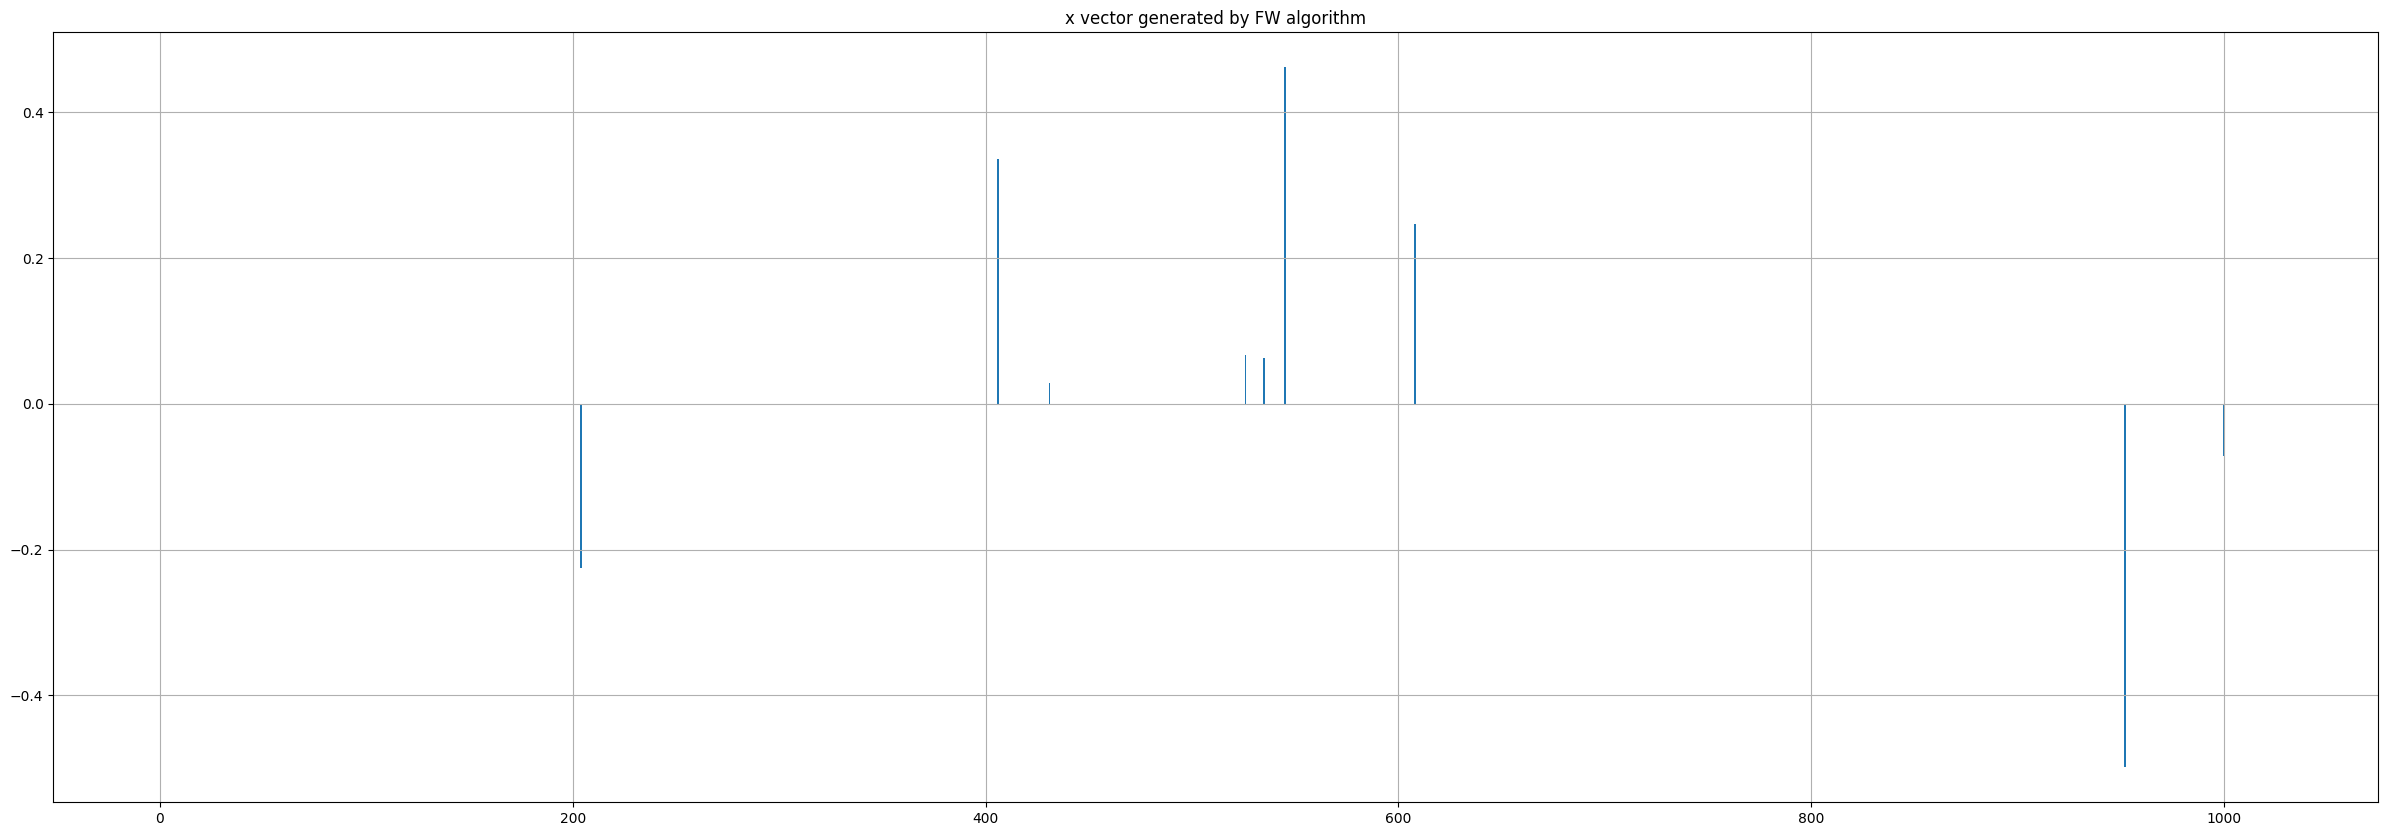

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.bar(np.arange(x.shape[0]),x)
plt.title("x vector generated by FW algorithm")
plt.grid();

In [35]:
list_absolute = [oracle_5(x,1)  for x in enregistrement]
list_relative = [oracle_5(x,1)/min(list_absolute)-1  for x in enregistrement]

In [45]:

fig = go.Figure()

fig.add_trace(go.Scatter(mode="markers", x=np.arange(len(enregistrement)), y=list_relative))
fig.update_layout(title='(f(x<sub>k</sub>)-<SPAN STYLE="text-decoration:overline">f</SPAN>)/<SPAN STYLE="text-decoration:overline">f</SPAN> given by FW algorithm')
fig.update_yaxes(type="log")
fig.show()